In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/fake_data_2.csv')

In [4]:
df.head()

,cargo,idade,salario,bonus,sócio
0,Diretor,45,24000.0,10000.0,sim
1,Analista,22,8000.0,2000.0,não
2,Programador,30,NaN,1000.0,não
3,Gerente,24,15100.0,NaN,não
4,Gerente,30,35000.0,6000.0,sim


In [5]:
df.isnull()

,cargo,idade,salario,bonus,sócio
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,True,False,False
3,False,False,False,True,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,True,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [6]:
hasNan = df.isnull().sum()
print(hasNan)

cargo      0
idade      0
salario    2
bonus      2
sócio      0
dtype: int64


In [8]:
dfTeste = df.copy()

dfTeste.dropna(axis=1, inplace=True) # isso aqui apaga as colunas por que axis = 1

print(dfTeste)

          cargo  idade sócio
0       Diretor     45   sim
1      Analista     22   não
2   Programador     30   não
3       Gerente     24   não
4       Gerente     30   sim
5   Programador     22   não
6      Analista     20   não
7       Diretor     50   sim
8      Fundador     65   sim
9      Analista     32   não
10  Programador     35   não
11  Programador     28   não
12     Fundador     28   sim
13  Programador     30   sim


In [9]:
dfTeste = df.copy()

dfTeste.dropna(axis=0, inplace=True) # isso aqui apaga as linhas por que axis = 0

print(dfTeste)

          cargo  idade  salario    bonus sócio
0       Diretor     45  24000.0  10000.0   sim
1      Analista     22   8000.0   2000.0   não
4       Gerente     30  35000.0   6000.0   sim
5   Programador     22   5300.0   2000.0   não
7       Diretor     50  18000.0   8000.0   sim
8      Fundador     65  38000.0  28000.0   sim
9      Analista     32   7300.0   4000.0   não
11  Programador     28   4500.0   2200.0   não
12     Fundador     28  30000.0  12000.0   sim
13  Programador     30  14000.0  10000.0   sim


In [10]:
dfTeste = df.copy()

dfTeste.fillna(0, inplace=True) # isso preenche valores faltantes com zero pq eu coloquei zero

print(dfTeste)

          cargo  idade  salario    bonus sócio
0       Diretor     45  24000.0  10000.0   sim
1      Analista     22   8000.0   2000.0   não
2   Programador     30      0.0   1000.0   não
3       Gerente     24  15100.0      0.0   não
4       Gerente     30  35000.0   6000.0   sim
5   Programador     22   5300.0   2000.0   não
6      Analista     20      0.0   1200.0   não
7       Diretor     50  18000.0   8000.0   sim
8      Fundador     65  38000.0  28000.0   sim
9      Analista     32   7300.0   4000.0   não
10  Programador     35   2344.0      0.0   não
11  Programador     28   4500.0   2200.0   não
12     Fundador     28  30000.0  12000.0   sim
13  Programador     30  14000.0  10000.0   sim


In [11]:
from sklearn.impute import SimpleImputer

impute_mean = SimpleImputer(missing_values = np.nan, strategy='mean')

In [13]:
df[['salario','bonus']] = impute_mean.fit_transform(df[['salario','bonus']])

print(df)

          cargo  idade       salario    bonus sócio
0       Diretor     45  24000.000000  10000.0   sim
1      Analista     22   8000.000000   2000.0   não
2   Programador     30  16795.333333   1000.0   não
3       Gerente     24  15100.000000   7200.0   não
4       Gerente     30  35000.000000   6000.0   sim
5   Programador     22   5300.000000   2000.0   não
6      Analista     20  16795.333333   1200.0   não
7       Diretor     50  18000.000000   8000.0   sim
8      Fundador     65  38000.000000  28000.0   sim
9      Analista     32   7300.000000   4000.0   não
10  Programador     35   2344.000000   7200.0   não
11  Programador     28   4500.000000   2200.0   não
12     Fundador     28  30000.000000  12000.0   sim
13  Programador     30  14000.000000  10000.0   sim


In [17]:
dfTeste = df.copy()

q1 = dfTeste['idade'].quantile(0.25)
q3 = dfTeste['idade'].quantile(0.75)
iqr = q3-q1
lLim = q1 - 1.5 * iqr
hLim = q3 + 1.5 * iqr
print(lLim)
print(hLim)

11.125
48.125


In [18]:
dfTeste['idade']>hLim

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8      True
9     False
10    False
11    False
12    False
13    False
Name: idade, dtype: bool

In [20]:
dfTeste.loc[dfTeste['idade'] < lLim, 'idade'] = lLim

In [21]:
dfTeste.loc[dfTeste['idade']>hLim, 'idade'] = hLim

In [22]:
dfTeste

,cargo,idade,salario,bonus,sócio
0,Diretor,45.000,24000.000000,10000.0,sim
1,Analista,22.000,8000.000000,2000.0,não
2,Programador,30.000,16795.333333,1000.0,não
3,Gerente,24.000,15100.000000,7200.0,não
4,Gerente,30.000,35000.000000,6000.0,sim
5,Programador,22.000,5300.000000,2000.0,não
6,Analista,20.000,16795.333333,1200.0,não
7,Diretor,48.125,18000.000000,8000.0,sim
8,Fundador,48.125,38000.000000,28000.0,sim
9,Analista,32.000,7300.000000,4000.0,não


<Axes: >

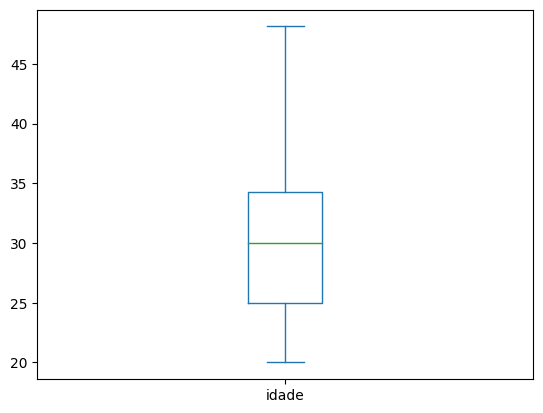

In [23]:
dfTeste['idade'].plot(kind = 'box')

In [24]:
from sklearn.preprocessing import Normalizer
df_normalize = df.copy()
df_normalize[['idade', 'salario', 'bonus']] = Normalizer().fit_transform(df[['idade','salario','bonus']])
df_normalize

,cargo,idade,salario,bonus,sócio
0,Diretor,0.001731,0.923076,0.384615,sim
1,Analista,0.002668,0.970139,0.242535,não
2,Programador,0.001783,0.998231,0.059435,não
3,Gerente,0.001435,0.902638,0.430397,não
4,Gerente,0.000845,0.985622,0.168964,sim
5,Programador,0.003884,0.935595,0.353055,não
6,Analista,0.001188,0.997457,0.071267,não
7,Diretor,0.002538,0.913809,0.406137,sim
8,Fundador,0.001377,0.805055,0.593198,sim
9,Analista,0.003844,0.876969,0.480531,não


<Axes: >

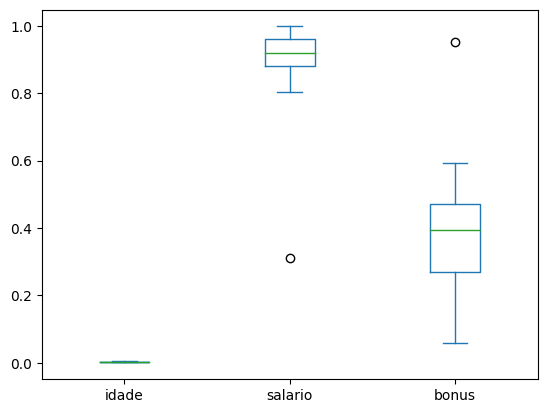

In [26]:
df_normalize.plot(kind = 'box')

In [27]:
from sklearn.preprocessing import MinMaxScaler

df[['idade','salario','bonus']] = MinMaxScaler().fit_transform(df[['idade','salario','bonus']])
print(df)

          cargo     idade   salario     bonus sócio
0       Diretor  0.555556  0.607359  0.333333   sim
1      Analista  0.044444  0.158627  0.037037   não
2   Programador  0.222222  0.405299  0.000000   não
3       Gerente  0.088889  0.357752  0.229630   não
4       Gerente  0.222222  0.915863  0.185185   sim
5   Programador  0.044444  0.082903  0.037037   não
6      Analista  0.000000  0.405299  0.007407   não
7       Diretor  0.666667  0.439085  0.259259   sim
8      Fundador  1.000000  1.000000  1.000000   sim
9      Analista  0.266667  0.138995  0.111111   não
10  Programador  0.333333  0.000000  0.229630   não
11  Programador  0.177778  0.060467  0.044444   não
12     Fundador  0.177778  0.775634  0.407407   sim
13  Programador  0.222222  0.326902  0.333333   sim


<Axes: >

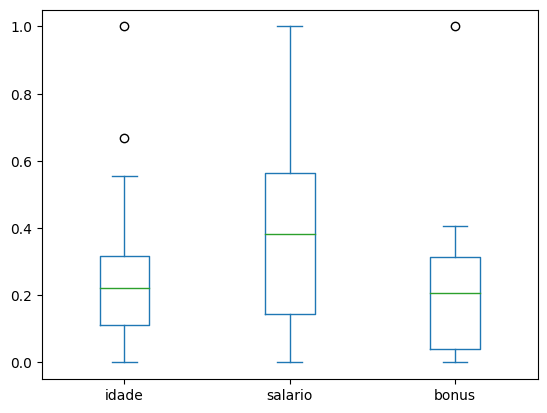

In [28]:
df.plot(kind = 'box')

In [29]:
from sklearn.preprocessing import StandardScaler

df[['idade','salario','bonus']] = StandardScaler().fit_transform(df[['idade','salario','bonus']])
print(df)

          cargo     idade   salario     bonus sócio
0       Diretor  1.002248  0.657862  0.415034   sim
1      Analista -0.907361 -0.803107 -0.770778   não
2   Programador -0.243149  0.000000 -0.919005   não
3       Gerente -0.741308 -0.154802  0.000000   não
4       Gerente -0.243149  1.662279 -0.177872   sim
5   Programador -0.907361 -1.049646 -0.770778   não
6      Analista -1.073414  0.000000 -0.889360   não
7       Diretor  1.417381  0.109999  0.118581   sim
8      Fundador  2.662778  1.936211  3.083113   sim
9      Analista -0.077096 -0.867024 -0.474325   não
10  Programador  0.171983 -1.319560  0.000000   não
11  Programador -0.409202 -1.122694 -0.741133   não
12     Fundador -0.409202  1.205726  0.711488   sim
13  Programador -0.243149 -0.255244  0.415034   sim


In [30]:
from sklearn.datasets import load_iris
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [31]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
df['target'] = pd.Series(data.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<Axes: >

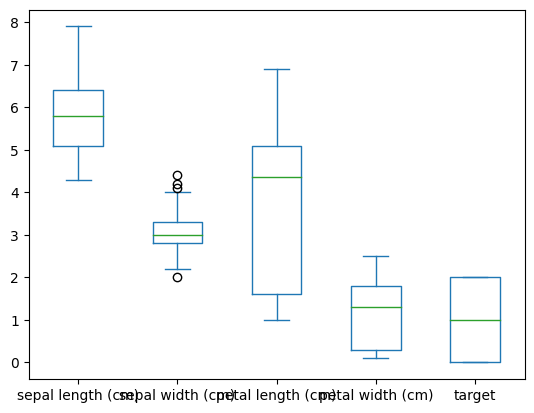

In [38]:
df.plot(kind = 'box')

In [40]:
dfTeste = df.copy()

q1 = dfTeste['sepal width (cm)'].quantile(0.25)
q3 = dfTeste['sepal width (cm)'].quantile(0.75)
iqr = q3-q1
lLim = q1 - 1.5 * iqr
hLim = q3 + 1.5 * iqr
print(lLim)
print(hLim)

2.05
4.05


In [41]:
dfTeste.loc[dfTeste['sepal width (cm)'] < lLim, 'sepal width (cm)'] = lLim
dfTeste.loc[dfTeste['sepal width (cm)'] > hLim, 'sepal width (cm)'] = hLim

<Axes: >

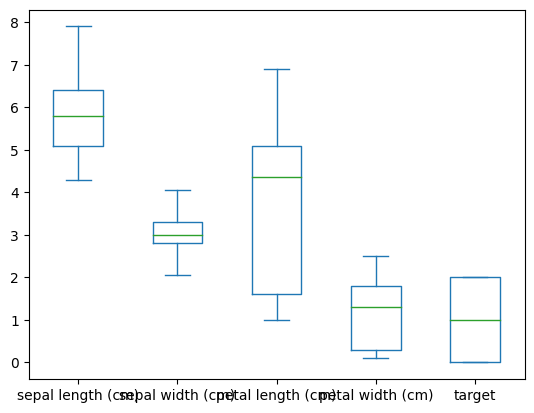

In [43]:
dfTeste.plot(kind = 'box')